# Juliaで学ぶタイトバインディング模型とトポロジカル物質
## 3. タイトバインディング模型とフーリエ変換
このノートでは、これまで実空間で定義してきたタイトバインディング模型の波数空間の性質について議論する。最初は一次元系を考え、最後は二次元正方格子模型を考える。固体物理における「バンド」がどのように表れるかを理解する。
### 3.1 一次元タイトバインディング模型
#### 3.1.1 フーリエ変換
これまで作ってきたタイトバインディング模型は一次元の系である。そして、隣のサイトとのホッピングのみを考えた模型であった。この模型において、あるサイト$i$におけるシュレーディンガー方程式は
$$
-t c_{i+1} -μ c_i - t c_{i-1} = E c_i
$$
と書くことができる。この模型を解析的に解くためには、フーリエ変換：
$$
c_i = \sum_k e^{i k x_i} c_k
$$
を用いると、
$$
\sum_k \left( -t e^{i k x_{i+1}}c_k -μ e^{i k x_i}c_k - t e^{i k x_{i-1}}c_k \right)  = E \sum_k e^{i k x_i} c_k
$$
と書ける。ここで、$x_i$はサイト$i$を表す座標であり、隣のサイトは隣の原子を表すので、原子間距離を$a$とすると、
$x_{i+1} = x_i + a$と書ける。よって、
$$
\sum_k c_k \left( -t e^{i k x_{i}}e^{i k a} -μ e^{i k x_i} - t e^{i k x_{i}} e^{-ika} \right)  = E \sum_k c_k e^{i k x_i}
$$
$$
\sum_k e^{i k x_i}c_k \left( -2 t \cos (k a) -μ   \right)  = E \sum_k c_k e^{i k x_i}
$$
と書ける。左辺と右辺が等しくなるためには、エネルギーは
$$
E = -2 t \cos (k a) -μ 
$$
となればよく、これが固有エネルギーである。このエネルギーは、$-k$と$-k$で同じ値を持ち二重縮退している。
もし、$m$個の原子が並んだ周期系であれば、周期境界条件は
$$
c_{i+m} = c_i
$$
であり、これはフーリエ変換を使った表示では
$$
\sum_k e^{i k (x_i+ ma)} c_k = \sum_k e^{i k x_i} c_k
$$
となる。つまり、この境界条件を満たすためには、
$$
k ma = 2π n
$$
でなければならず、
$$
k = n \frac{2 \pi}{ma}
$$
という条件がつく。ここで、$n = 0,\pm 1, \pm 2, \cdots, $である。

#### 3.1.2 最大の波数とブリルアンゾーン
フーリエ変換を使うことで固有エネルギーを得ることができた。そして、
得られた波数は離散化されていることもわかった。次に、この波数の最大値について調べる。
エネルギーはcos関数で表現されており、その中身は$ka$である。よって、波数の範囲は
$$
-\frac{\pi}{a} < k < \frac{\pi}{a},
$$
となる。これ以上の大きな波数を考えても、cos関数が周期的であるために大きなエネルギーを得ることはできない。
たとえば、波数として
$$
k = \frac{3.5 \pi}{a}
$$
を考える。これは、
$$
\cos (ka) = \cos (3.5 \pi) = \cos (1.5 \pi)
$$
となり、$k = 1.5 \pi/a$の時と等しい。  
これらの議論は物理的には何を意味しているだろうか？  

Juliaで様子をプロットしてみよう。
固有関数は$e^{ikx}$と$e^{-ikx}$であり、二つの線形結合もやはり解である。そこで、
$$
\psi_k(x) = (e^{ikx} + e^{-ikx})/2 = \cos kx 
$$
をプロットしよう。   
まず、格子点をプロットする。

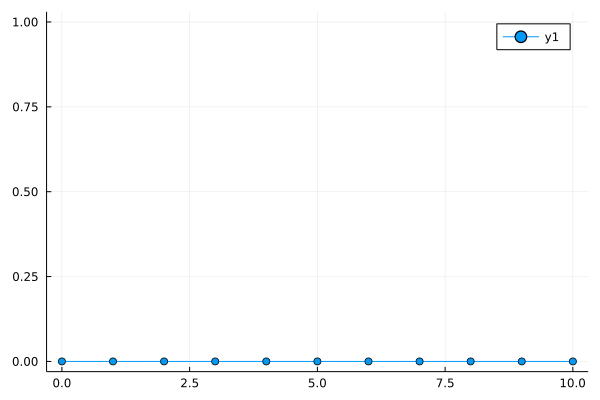

In [1]:
using Plots
a = 1.0
m = 10
vecx = [i for i in 0:m] 
lattice = [0.0 for i in 0:m]
plot(vecx,lattice,marker=:circle)

このプロットでの丸が原子の位置を表している。
ここで、系のサイズを$m$として$m=10$とおいた。
波数は
$$
k = i 2\pi/L
$$
となっているが、$i=2$を選んでみる。このとき、固有関数は

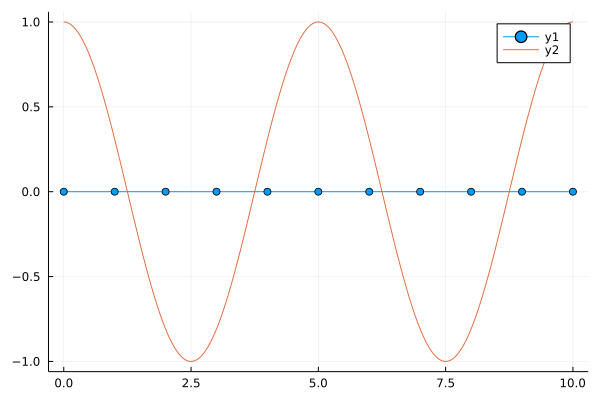

In [2]:
ns = 100
vecx1 = [i/ns for i in 0:ns*(m)]
k = 2*2π/(m)
wave1 = cos.(k*vecx1)
plot!(vecx1,wave1)

となる。この波数に対して、$2\pi$だけずらしたものを考える。その関数を重ねて描いてみると、

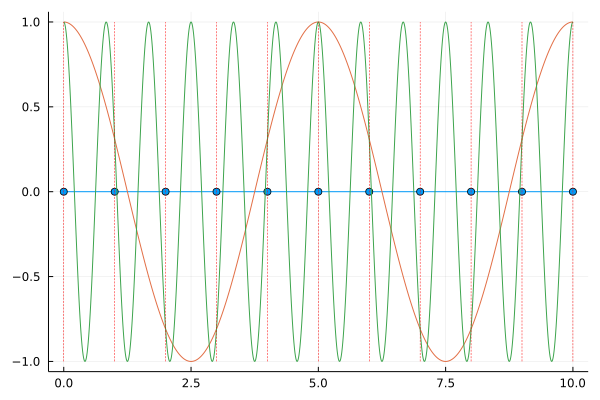

In [3]:
k += 2π
wave2 = cos.(k*vecx1)

plot!(vecx1,wave2)


c = "red"
lw = 0.5
ls = :dash
for x in vecx
    plot!([x,x],[-1,1], color=c, lw=lw, ls=ls)
end
plot!(legend=false)

となる。ここで、原子の上での波動関数の値がわかりやすいように、赤点線をつけた。  
見ればわかるように、赤点線と二つのグラフの交点は交わり、同じ値を持つ。
タイトバインディング模型では、それぞれの座標点での値は、それぞれの座標点における束縛状態の重みだったことを思い出そう。つまり、座標点以外の場所での値は物理的には意味がない。よって、波数を$2\pi$ずらした大きい波数の関数は、もとの関数と完全に同じになる。さらに言えば、$2\pi$ずらした波動関数は、原子と原子の間で振動しているが、このような振動は物理的には意味がない。  
数学的には、ここで考えているフーリエ変換は離散フーリエ変換であり、
- 離散座標点のフーリエ変換を行うと、変換先の変数には周期が存在する。
- ある周期を持つ変数のフーリエ変換を行うと、変換先の変数はとびとびの値を持つ。  

という性質がある。
タイトバインディング模型では常に原子と原子の間隔があり実空間は離散座標点で表現されているため、常に波数には周期があることになる。その周期は原子間距離$a$で決まっており、この周期の領域を「ブリルアンゾーン」と呼ぶ。

#### 3.1.3 フェルミエネルギーと状態密度
前回のノートで、フェルミエネルギー（化学ポテンシャル）を導入し、負のエネルギー固有値を足し上げることで電子のフィリングを計算した。
あるフェルミエネルギー$E_F$を設定したときの基底状態のエネルギーは
$$
E = \sum_{i,\epsilon_i < 0} \epsilon_i
$$
と書ける。ここで、このエネルギーに一番近い励起状態はどのようなものか？  電子は同じ一粒子状態を取ることができないので、一番小さい正のエネルギー固有値を持つ波動関数の状態を付け加えるとよい。ここで、電子数が一定であるならば、フェルミエネルギーに一番近い負のエネルギー固有値を持つ波動関数を消去してから付け加えることになる。フェルミエネルギーから離れれば離れるほどエネルギーの損失が大きくなる。このことから、**固体中の電子集団の性質は、フェルミエネルギー近傍の電子のふるまいによって決定されている**ことがわかる。  たとえば、フェルミエネルギー近傍の電子数が多ければ多いほど、より電流が流れたりする。

「フェルミエネルギー近傍の電子数」は、フェルミエネルギー近傍のエネルギー固有値の数を数えることで求めることができる。そこで、あるエネルギーにおける状態の数を「状態密度$\rho(E)$」と呼ぼう。この状態密度は、電子数を数え上げればいいので、
$$
\rho(E) = \sum_i \delta(E - \epsilon_i)
$$
を計算すればよい。ここで、$\delta(x)$はデルタ関数である。  
数値計算においては、エネルギーに幅をもたせてカウントすればよい。実際に状態密度を計算してみよう。Juliaでは、histogramを用いて簡単にプロットすることができる。

前回のノートでも用いたハミルトニアンは

In [4]:
function calc_HtbModel(Nx,μ)
    mat_Htb = zeros(Float64,Nx,Nx)    
    t = 1.0
    for i =1:Nx
        for dx in -1:1
            j = i + dx
            j += ifelse(j > Nx,-Nx,0)
            j += ifelse(j < 1,Nx,0)
            
            if dx ==0
                mat_Htb[i,j] = -μ
            elseif abs(dx) == 1   
                mat_Htb[i,j] = -t    
            end
        end
    end 
    
    return mat_Htb
end

calc_HtbModel (generic function with 1 method)

として、固有値を計算し、ヒストグラムを描いてみよう。

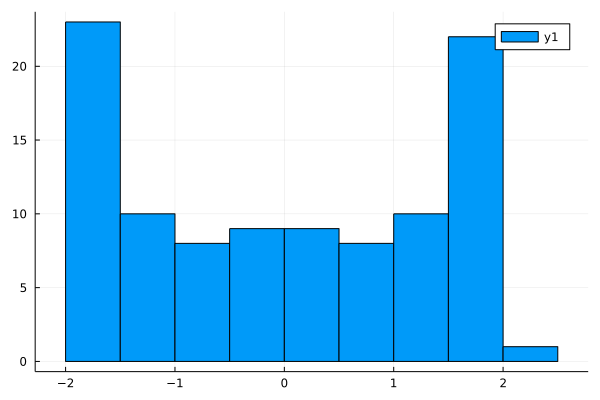

In [5]:
using LinearAlgebra
μ=0.0
Nx = 100
mat_H = calc_HtbModel(Nx,μ)
energy,mat_v = eigen(mat_H)
histogram(energy,bins=10)

エネルギーは$-2 \cos(ka) -\mu$で与えられているため、$\pm 2$あたりが一番状態密度が大きい。それを見るためにもう少しサイズを大きくしてみよう。

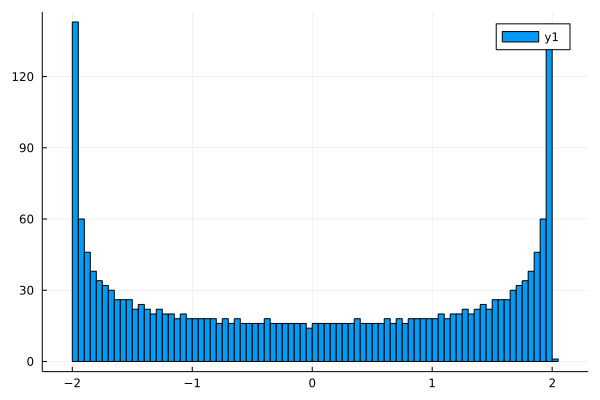

In [6]:
μ=0.0
Nx = 2000
mat_H = calc_HtbModel(Nx,μ)
energy,mat_v = eigen(mat_H)
histogram(energy,bins=100)

見てわかるように、$\pm 2$での状態密度が大きい。この状態密度の大きさを議論することによって、超伝導転移温度がどのくらい大きいかなども議論できる。

### 3.2 二次元タイトバインディング模型
####  3.2.1 正方格子模型の性質
一次元系を考えることは物事を単純化する上で便利ではあるが、実際の物質は三次元系である。もちろん、その中に一次元的なふるまいをするものや、二次元的なふるまいをするものある。ここでは、Juliaで簡単にコードを書けることを利用して、二次元正方格子のタイトバインディング模型について触れてみよう。正方格子のタイトバインディング模型は、銅酸化物高温超伝導体の有効モデルであるハバード模型として非常に広く研究されている。
次回以降で、様々な物質のタイトバインディング模型について触れる予定である。

ホッピングとして、最近接ホッピングのみを考える。このとき、ハミルトニアンは

In [7]:
function calc_HtbModel2D(Nx,Ny,μ)
    N = Nx*Ny
    mat_Htb = zeros(Float64,N,N)    
    t = 1.0
    for ix =1:Nx
        for iy=1:Ny            
            for dx in -1:1
                for dy in -1:1
                    jx = ix + dx
                    
                    jx += ifelse(jx > Nx,-Nx,0)
                    jx += ifelse(jx < 1,Nx,0)
                    
                    jy = iy + dy
                    jy += ifelse(jy > Ny,-Ny,0)
                    jy += ifelse(jy < 1,Ny,0)
                    
                    ii = (iy-1)*Nx+ix
                    jj = (jy-1)*Nx+jx
                    
                    if dx == 0 && dy == 0
                        mat_Htb[ii,jj] = -μ
                    elseif abs(dx)==1 && dy ==0
                        mat_Htb[ii,jj] = -t
                    elseif abs(dy)==1 && dx == 0
                        mat_Htb[ii,jj] = -t
                    end
                end
            end
        end
    end
                    
        
    return mat_Htb
end

calc_HtbModel2D (generic function with 1 method)

となる。状態密度は

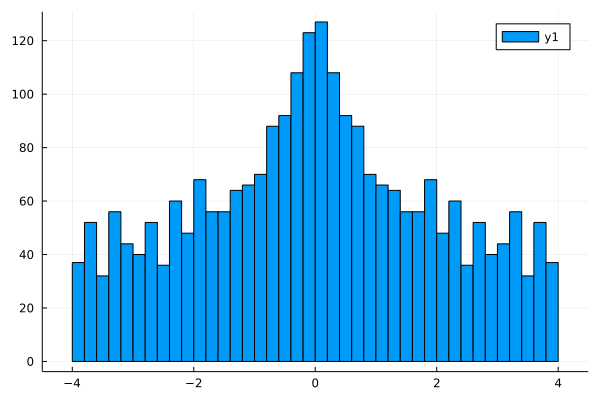

In [8]:
μ=0.0
Nx = 50
Ny = 50
mat_H = calc_HtbModel2D(Nx,Ny,μ)
energy,mat_v = eigen(mat_H)
histogram(energy,bins=50)

となり、ゼロエネルギーが一番状態密度が大きい。

なお、この模型はフーリエ変換によって解析的に解けて、そのエネルギーは
$$
E = -2t( \cos (k_x a) + \cos (k_y a)) -\mu
$$
と書ける。
波数空間でこのエネルギーをプロットしてみると、

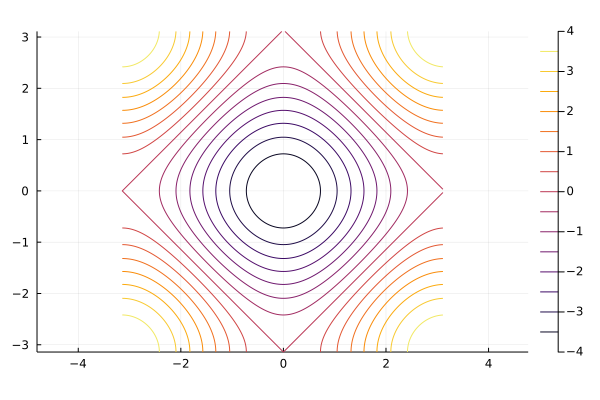

In [9]:
f(kx,ky) = -2*(cos(kx) + cos(ky))

x = -π:π/100:π
y = -π:π/100:π
z = [f(i,j) for i in x, j in y]'

plot(x,y,z)
plot!(aspect_ratio=:equal)

となる。ここで、$a = 1$とした。
等高線は狭ければ変化が急であり、広ければ変化がゆっくりであることを考えると、等高線が広いところは状態密度が大きいことがわかる。よって、$(\pi,0)$や$(0,\pi)$のあたりは等高線が緩く、状態密度が大きい。
これをより定量的に評価するには、この$k$空間での勾配を計算すればよく、
$$
{\rm grad} E = (- 2\sin k_x, - 2\sin k_y)
$$
なので、その大きさは
$$
|{\rm grad} E|^2 = 4 (\sin^2 k_x + \sin^2 k_y) 
$$
となる。
$(\pi,0)$や$(0,\pi)$での勾配の大きさはゼロとなり、最小である。
勾配が小さいほど状態が集まっていると考えられるので、勾配の大きさをプロットすると、

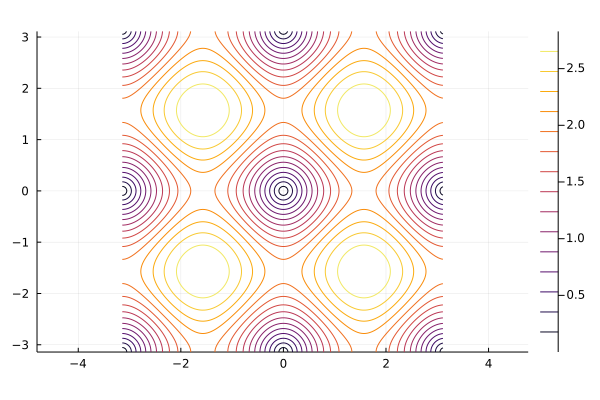

In [10]:
grad(kx,ky) = sqrt((4*(sin(kx)^2 + sin(ky)^2)))

x = -π:π/100:π
y = -π:π/100:π
z = [grad(i,j) for i in x, j in y]'

plot(x,y,z)
plot!(aspect_ratio=:equal)


となる。

#### 3.2.2 片側だけフーリエ変換
最後に、2次元の系の片方だけフーリエ変換してみよう。つまり、$y$だけフーリエ変換する。
そのハミルトニアンは、先ほどの模型の$y$の自由度のループを消去して、$x$に関する対角要素に$-2 \cos (k_y)$を足せばよい。

In [11]:
function calc_HtbModelX(Nx,ky,μ)
    mat_Htb = zeros(Float64,Nx,Nx)    
    t = 1.0
    for ix =1:Nx            
        for dx in -1:1
            jx = ix + dx
                    
            jx += ifelse(jx > Nx,-Nx,0)
            jx += ifelse(jx < 1,Nx,0)
            if dx == 0
                mat_Htb[ix,jx] = -μ -2*t*cos(ky)
            elseif abs(dx) == 1
                mat_Htb[ix,jx] = -t
            end

        end
    end
                    
        
    return mat_Htb
end

calc_HtbModelX (generic function with 1 method)

このハミルトニアンをつかって、$k_y$依存性を見てみると、

-3.141592653589793:0.06346651825433926:3.141592653589793


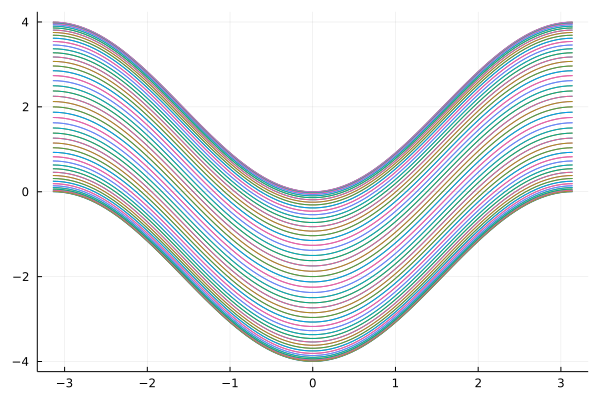

In [12]:
μ=0.0
Nx = 100
nky = 100
vky =range(-π,π,length=nky)
println(vky)
ep = zeros(Float64,nky,Nx)
cnt = 0
for ky in vky    
    cnt += 1
    mat_H = calc_HtbModelX(Nx,ky,μ)
    energy,mat_v = eigen(mat_H)
    for i=1:Nx
        #println(energy[i])
        ep[cnt,i] = energy[i]
    end
end
plot(vky,ep)
plot!(legend=false)

となり、$\pm 4$の間に沢山の状態があることがわかる。これを「バンド」と呼ぶ。なお、線の詰まり具合が状態密度の大きさを表している。

さて、フェルミエネルギーがゼロの場合、状態がたくさんあることがわかる。もし、$N_x$が非常に大きい場合、状態も非常に多い。格子の点の数が無限にあると思えば、無限に状態は存在する。これはつまり、フェルミエネルギー近傍には無数の状態があり、無限小の励起状態も大量にあるということになる。よって、少しの摂動で容易に基底状態からずれる。そのため、電圧をかけると大量の電子が移動することになる。つまり、この模型は金属の模型であることがわかる。金属か否かは、このバンドの中にフェルミエネルギーがあるかどうか、で決まる。もし、フェルミエネルギーが$-4$よりも小さい場合、状態は何もない。よって、電流も流れない。




この模型では一本のバンドしか現れないが、他の模型を考えることで、複数のバンドが現れてくる。そのバンドの様子は次回以降のノートで述べる予定である。